In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

In [204]:
train = pd.read_csv("C:/Users/User/Desktop/mini2/train.csv")
test = pd.read_csv("C:/Users/User/Desktop/mini2/test.csv")
sample = pd.read_csv("C:/Users/User/Desktop/mini2/sample_submission.csv")

In [205]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2441 non-null   int64  
 1   url_len                  2441 non-null   int64  
 2   url_num_hyphens_dom      2441 non-null   int64  
 3   url_path_len             1975 non-null   float64
 4   url_domain_len           1975 non-null   float64
 5   url_hostname_len         1978 non-null   float64
 6   url_num_dots             2441 non-null   int64  
 7   url_num_underscores      2441 non-null   int64  
 8   url_query_len            2441 non-null   int64  
 9   url_num_query_para       2441 non-null   int64  
 10  url_ip_present           2441 non-null   int64  
 11  url_entropy              2441 non-null   float64
 12  url_chinese_present      2441 non-null   int64  
 13  url_port                 2441 non-null   int64  
 14  html_num_tags('iframe') 

In [206]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3664 non-null   float64
 1   url_num_hyphens_dom      3664 non-null   float64
 2   url_path_len             3663 non-null   float64
 3   url_domain_len           3663 non-null   float64
 4   url_hostname_len         3664 non-null   float64
 5   url_num_dots             3664 non-null   float64
 6   url_num_underscores      3664 non-null   float64
 7   url_query_len            3664 non-null   float64
 8   url_num_query_para       3664 non-null   float64
 9   url_ip_present           3664 non-null   float64
 10  url_entropy              3664 non-null   float64
 11  url_chinese_present      3664 non-null   float64
 12  url_port                 3664 non-null   float64
 13  html_num_tags('iframe')  3664 non-null   float64
 14  html_num_tags('script') 

In [207]:
train.isna().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               1
url_domain_len             1
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
label                      0
dtype: int64

In [208]:
train.dropna(axis=0, inplace = True)

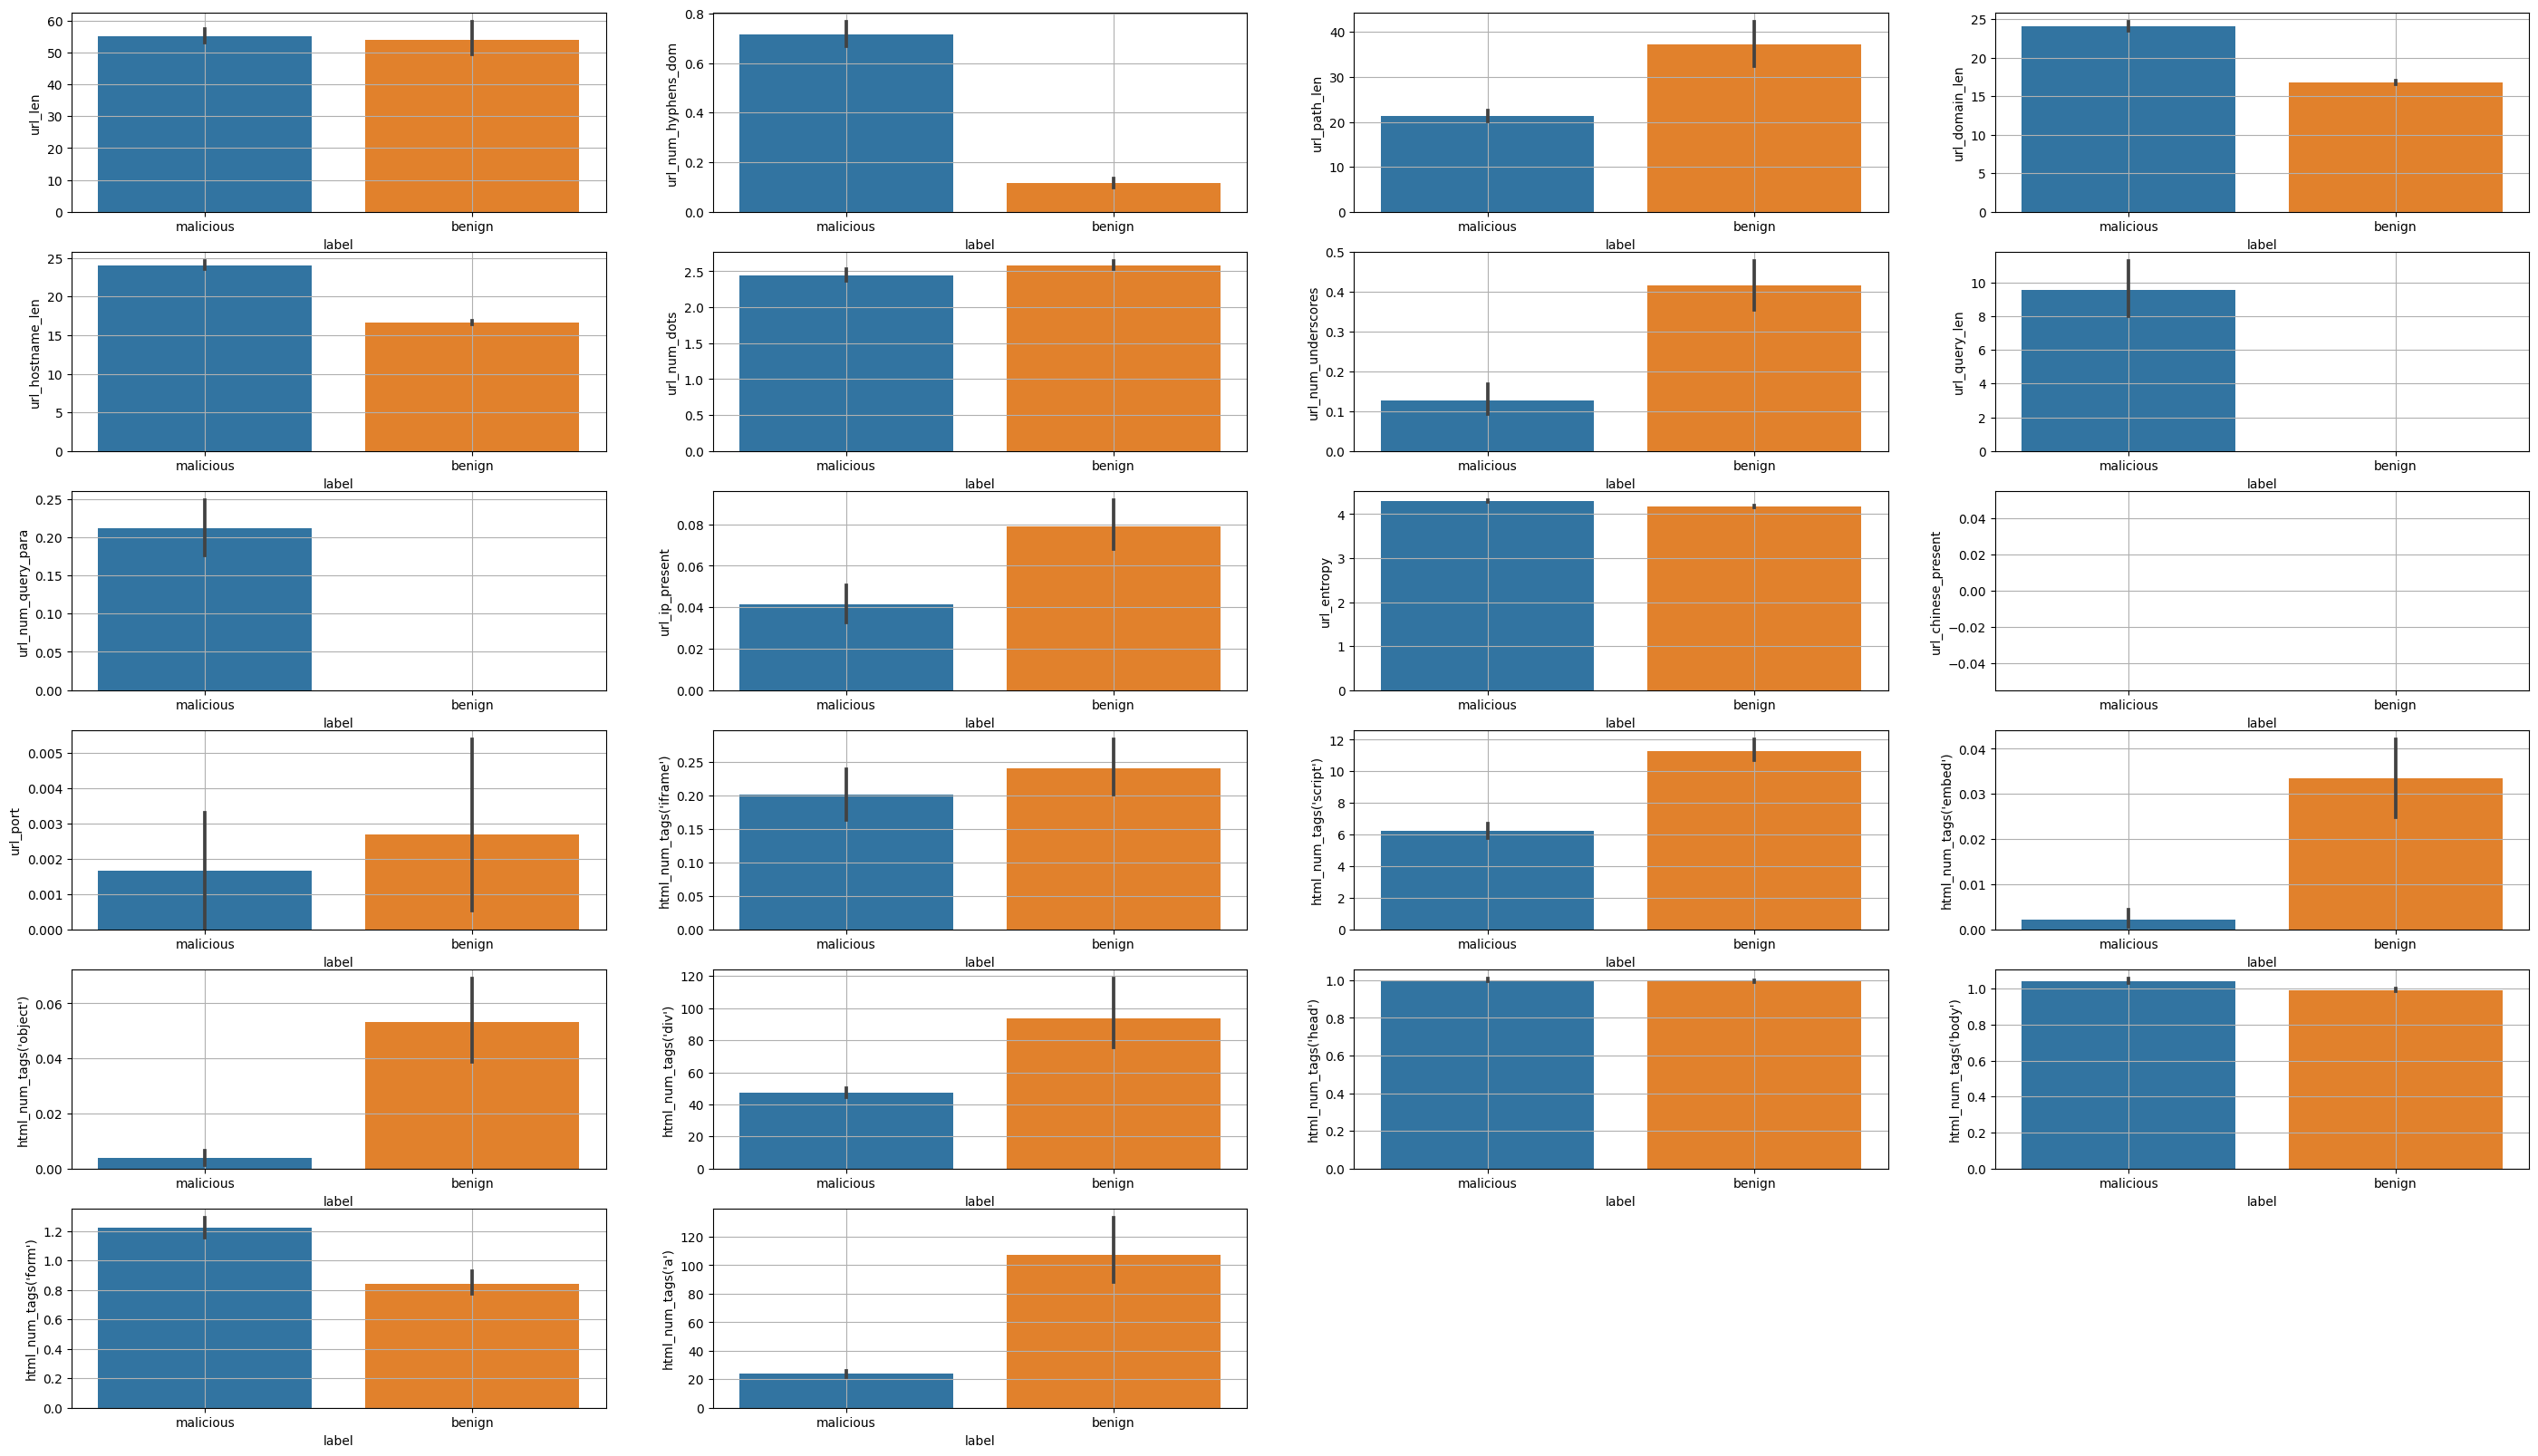

In [209]:
plt.figure(figsize = (35, 20))
for i in range(len(train.columns)-2):
    plt.subplot(6,4,i+1)
    sns.barplot(x="label", y=train.columns[i], data=train)
    plt.grid()
plt.show()

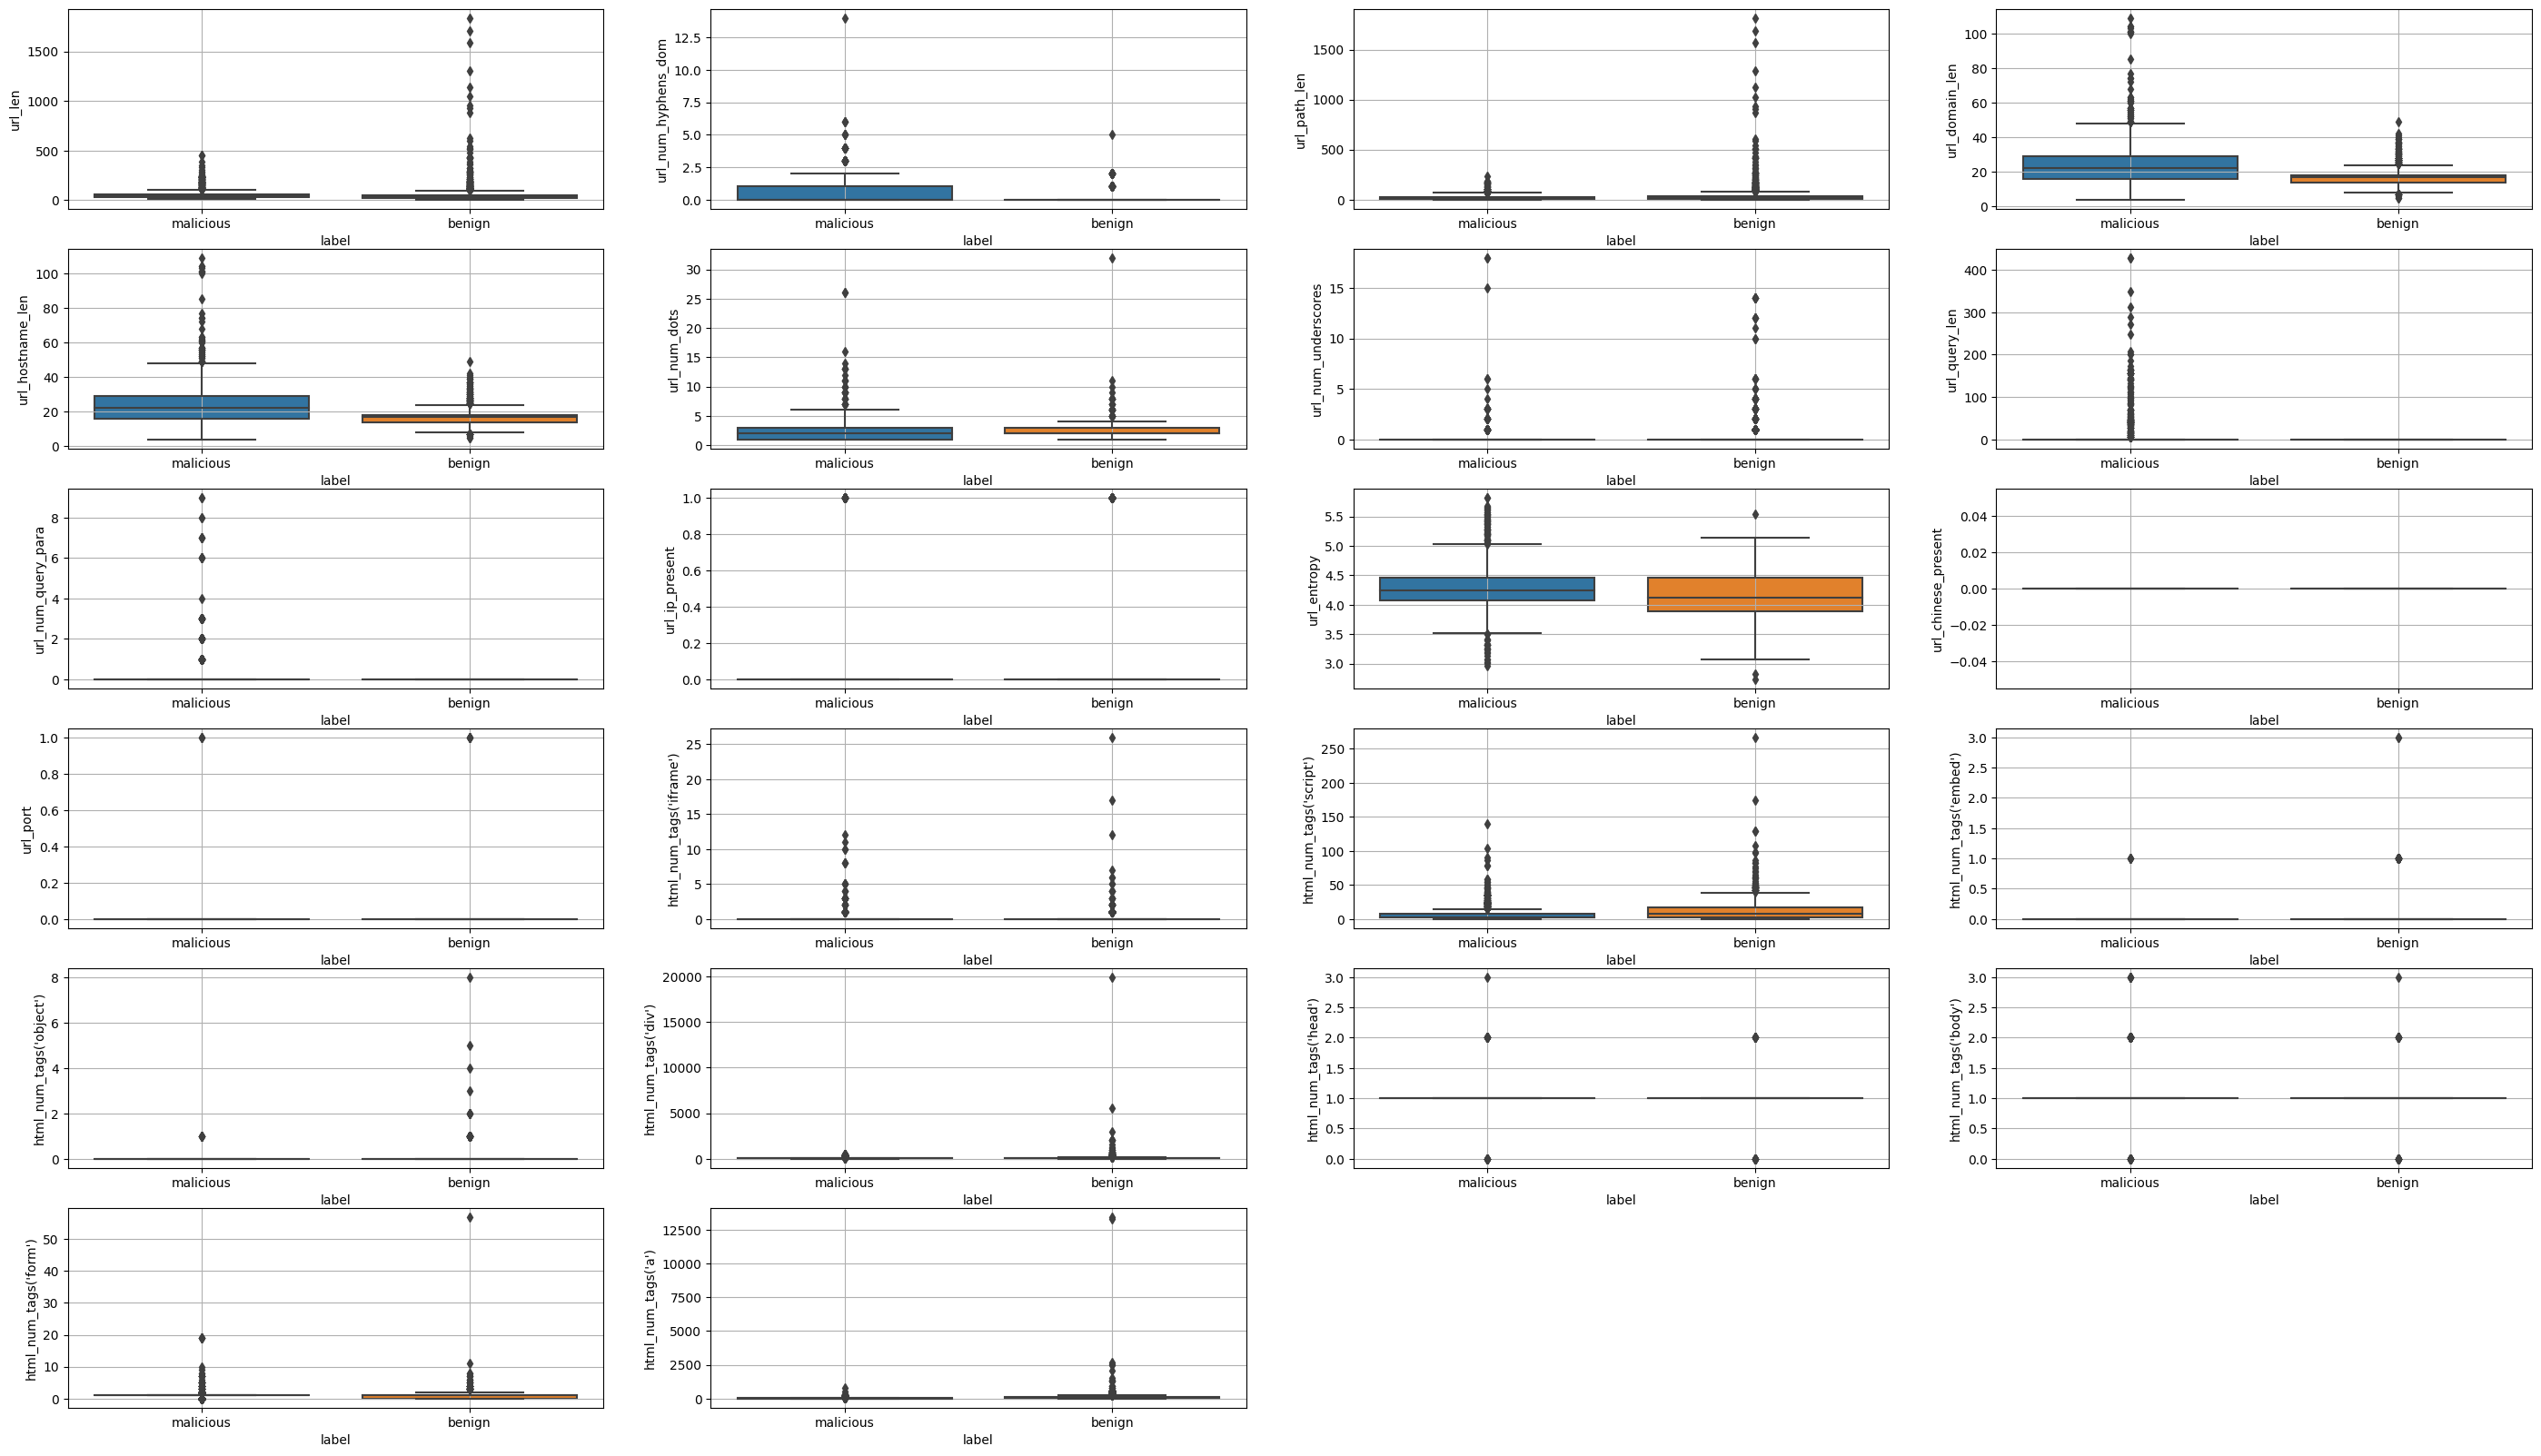

In [210]:
plt.figure(figsize = (35, 20))
for i in range(len(train.columns)-2):
    plt.subplot(6,4,i+1)
    sns.boxplot(x="label", y=train.columns[i], data=train)
    plt.grid()
plt.show()

In [211]:
columns = ['url_num_hyphens_dom', 'url_num_underscores', 'url_query_len', 'url_num_query_para', "html_num_tags('embed')","html_num_tags('object')"
           , "html_num_tags('a')",'label', 'url_path_len', 'url_domain_len', 'url_hostname_len', 'url_ip_present', "html_num_tags('script')", "html_num_tags('div')"]
train_1 = train[columns]

In [212]:
from sklearn.model_selection import train_test_split

# Target 확인
target = 'label'

# 데이터 분리
x = train_1.drop(target, axis=1)
y = train_1.loc[:, target]

# 학습용, 평가용 데이터 85:15으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=1)

In [213]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# 선언하기
model = DecisionTreeClassifier(random_state=1)

# 성능검증
cv_score = cross_val_score(model, x_train, y_train, cv=10)

# 확인
print('성능:', cv_score.round(2))
print('평균:', cv_score.mean().round(2))

성능: [0.94 0.91 0.92 0.94 0.96 0.9  0.91 0.95 0.92 0.92]
평균: 0.93


In [224]:
# 불러오기
from sklearn.metrics import confusion_matrix, classification_report

# 선언하기
model = DecisionTreeClassifier(max_depth=5, random_state=1)

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[247  27]
 [ 55 221]]
              precision    recall  f1-score   support

      benign       0.82      0.90      0.86       274
   malicious       0.89      0.80      0.84       276

    accuracy                           0.85       550
   macro avg       0.85      0.85      0.85       550
weighted avg       0.85      0.85      0.85       550



In [230]:
# 불러오기
from sklearn.model_selection import GridSearchCV

# 기본 모델 선언
model_dt = DecisionTreeClassifier(random_state=1)

# 파라미터 선언
params = {'max_depth': range(1, 51)}

# 모델 선언
model = GridSearchCV(model_dt,
                     params,
                     cv=5,
                      
                     scoring='accuracy')   

In [218]:
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': range(1, 51)}, scoring='accuracy')

In [219]:
# 예측 결과 확인
print(model.best_params_)
print(model.best_score_) 

{'max_depth': 16}
0.9273760922411525


In [201]:
!pip install lightgbm


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [96]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [225]:
# 선언하기
model = RandomForestClassifier()

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      benign       0.92      0.95      0.93       274
   malicious       0.94      0.92      0.93       276

    accuracy                           0.93       550
   macro avg       0.93      0.93      0.93       550
weighted avg       0.93      0.93      0.93       550



In [241]:
# 기본 모델 선언
model_dt = RandomForestClassifier(random_state=1)

# 파라미터 선언
params = {'max_depth': range(1, 51)}

# 모델 선언
model = GridSearchCV(model_dt,
                     params,
                     cv=5,
                      
                     scoring='accuracy')   

In [242]:
model.fit(x_train, y_train)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "c:\Users\User

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': range(1, 51)}, scoring='f1')

In [243]:
# 예측 결과 확인
print(model.best_params_)
print(model.best_score_) 

{'max_depth': 1}
nan


In [134]:
test_1.describe()

,url_num_hyphens_dom,url_num_underscores,url_query_len,url_num_query_para,html_num_tags('embed'),html_num_tags('object'),html_num_tags('a'),url_path_len,url_domain_len,url_hostname_len,url_ip_present,html_num_tags('script'),html_num_tags('div')
count,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,1980.000000,1975.000000,1975.000000,1978.000000,2441.000000,1974.000000,2441.000000
mean,0.415404,0.274068,4.890619,0.092175,0.016387,0.029906,66.969697,27.541772,20.262785,20.239130,0.063499,8.763931,62.399836
std,0.804898,1.199325,34.050793,0.555988,0.145062,0.245297,347.757511,77.511820,8.756778,8.701185,0.243908,11.744794,143.137764
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,14.000000,14.000000,0.000000,2.000000,6.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.500000,12.000000,17.000000,17.000000,0.000000,4.000000,32.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.250000,29.000000,24.000000,24.000000,0.000000,12.750000,61.000000
max,6.000000,19.000000,1088.000000,12.000000,3.000000,6.000000,11868.000000,1631.000000,100.000000,99.000000,1.000000,158.000000,3861.000000


In [102]:
columns.remove('label')
test_1 = test[columns]

In [140]:
test_1.isna().sum()

url_num_hyphens_dom          0
url_num_underscores          0
url_query_len                0
url_num_query_para           0
html_num_tags('embed')       0
html_num_tags('object')      0
html_num_tags('a')         461
url_path_len               466
url_domain_len             466
url_hostname_len           463
url_ip_present               0
html_num_tags('script')    467
html_num_tags('div')         0
dtype: int64

In [141]:
test_1["html_num_tags('a')"] = test_1["html_num_tags('a')"].fillna(test_1["html_num_tags('a')"].mean())
test_1["url_path_len"] = test_1["url_path_len"].fillna(test_1["url_path_len"].mean())
test_1["url_domain_len"] = test_1["url_domain_len"].fillna(test_1["url_domain_len"].mean())
test_1["url_hostname_len"] = test_1["url_hostname_len"].fillna(test_1["url_hostname_len"].mean())
test_1["html_num_tags('script')"] = test_1["html_num_tags('script')"].fillna(test_1["html_num_tags('script')"].mean())

C:\Users\User\AppData\Local\Temp\ipykernel_15296\665889834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_1["html_num_tags('a')"] = test_1["html_num_tags('a')"].fillna(test_1["html_num_tags('a')"].mean())
C:\Users\User\AppData\Local\Temp\ipykernel_15296\665889834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_1["url_path_len"] = test_1["url_path_len"].fillna(test_1["url_path_len"].mean())
C:\Users\User\AppData\Local\Temp\ipykernel_15296\665889834.py:3: SettingWithCopyWarning: 
A value is

In [143]:
X_test = test_1

In [145]:
set(x_train.columns)-set(X_test.columns)

set()

In [235]:
y_pred = model.predict(X_test)

In [236]:
sample = pd.read_csv("C:/Users/User/Desktop/mini2/sample_submission.csv")
sample['label'] = y_pred
sample = sample.set_index('id')

In [237]:
sample.head()

,label
id,
0,benign
1,benign
2,benign
3,malicious
4,benign


In [238]:
sample.to_csv("C:/Users/User/Desktop/mini2/submission1.csv")